In [3]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5dd87c2d8aa73411660ac35310d161029bc8edbc223697b3d3c5c2a795167684
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [1]:
from pca import pca
import numpy as np
import pandas as pd

In [2]:

features = ['TG' ,'CA', 'AG', 'CT', 'GA','TC','AC','GT','CC','GG','AA','TT','AT','TA','AG','GC']

# load dataset as pandas dataframe
df = pd.read_csv('new_all.csv')
df

,name,class,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
0,Acinonyx_jubatus,Mammals,1.27,1.27,1.22,1.20,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.56,0.44,0.96
1,Ailuropoda_melanoleuca,Mammals,1.26,1.27,1.23,1.21,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.55,0.44,0.97
2,Artibeus_jamaicensis,Mammals,1.29,1.29,1.23,1.22,1.07,1.08,0.86,0.85,0.83,0.83,0.79,0.79,0.83,0.54,0.45,0.97
3,Arvicanthis_niloticus,Mammals,1.31,1.32,1.26,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.85,0.56,0.37,0.98
4,Arvicola_amphibius,Mammals,1.31,1.31,1.25,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.84,0.55,0.39,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Thalassiosira_pseudonana_CCMP1335,Protozoa,1.23,1.23,1.00,1.00,1.20,1.20,0.96,0.96,0.76,0.75,0.82,0.82,1.01,0.57,0.84,0.91
1108,Theileria_annulata,Protozoa,1.12,1.12,1.01,1.00,1.10,1.11,0.95,0.95,0.92,0.91,0.80,0.79,0.93,0.78,0.67,0.78
1109,Theileria_equi_strain_WA,Protozoa,1.14,1.14,1.03,1.02,1.10,1.10,0.90,0.90,0.89,0.89,0.78,0.78,0.97,0.78,0.70,0.92
1110,Theileria_parva_strain_Muguga,Protozoa,1.12,1.12,1.01,1.01,1.10,1.10,0.97,0.96,0.91,0.91,0.80,0.80,0.91,0.77,0.69,0.77


In [3]:
species = df['name']
grouping = df['class']

In [4]:
grouping
#species

0        Mammals
1        Mammals
2        Mammals
3        Mammals
4        Mammals
          ...   
1107    Protozoa
1108    Protozoa
1109    Protozoa
1110    Protozoa
1111    Protozoa
Name: class, Length: 1112, dtype: object

In [5]:
non_numeric =['name', 'class']
species = df['name']
non_numeric

['name', 'class']

In [8]:
df_numeric = df.drop(non_numeric, axis = 1)

# Set index
df_numeric.index=y
df_numeric


,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
Mammals,1.27,1.27,1.22,1.20,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.56,0.44,0.96
Mammals,1.26,1.27,1.23,1.21,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.55,0.44,0.97
Mammals,1.29,1.29,1.23,1.22,1.07,1.08,0.86,0.85,0.83,0.83,0.79,0.79,0.83,0.54,0.45,0.97
Mammals,1.31,1.32,1.26,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.85,0.56,0.37,0.98
Mammals,1.31,1.31,1.25,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.84,0.55,0.39,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Protozoa,1.23,1.23,1.00,1.00,1.20,1.20,0.96,0.96,0.76,0.75,0.82,0.82,1.01,0.57,0.84,0.91
Protozoa,1.12,1.12,1.01,1.00,1.10,1.11,0.95,0.95,0.92,0.91,0.80,0.79,0.93,0.78,0.67,0.78
Protozoa,1.14,1.14,1.03,1.02,1.10,1.10,0.90,0.90,0.89,0.89,0.78,0.78,0.97,0.78,0.70,0.92
Protozoa,1.12,1.12,1.01,1.01,1.10,1.10,0.97,0.96,0.91,0.91,0.80,0.80,0.91,0.77,0.69,0.77


In [7]:
y =  df['class'].to_numpy()

In [9]:
features

['TG',
 'CA',
 'AG',
 'CT',
 'GA',
 'TC',
 'AC',
 'GT',
 'CC',
 'GG',
 'AA',
 'TT',
 'AT',
 'TA',
 'AG',
 'GC']

In [12]:
# Initialize
model = pca(n_components=0.95, normalize=False)

In [13]:
# Fit transform
out = model.fit_transform(df_numeric)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


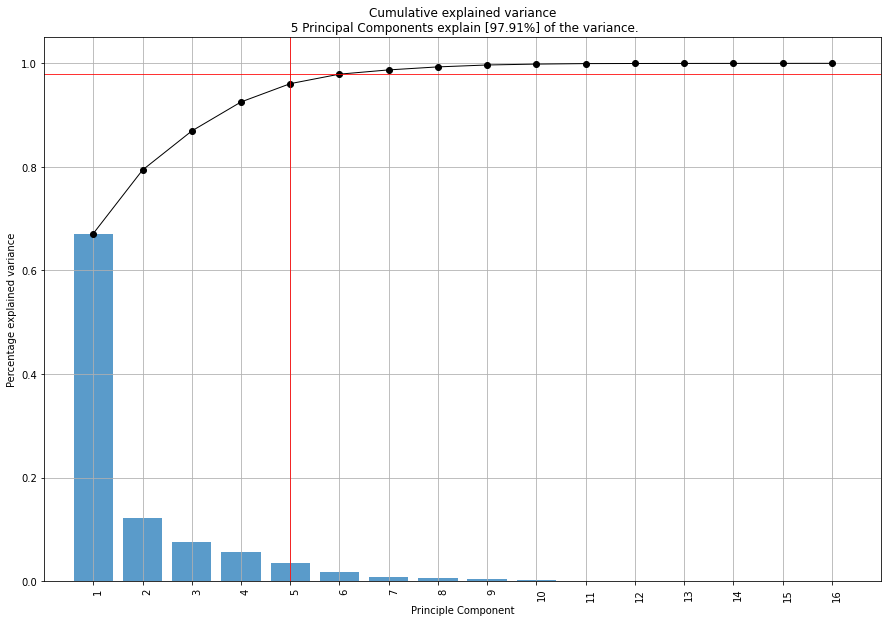

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [97.91%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [14]:
model.plot()

[pca] >Plot PC1 vs PC2 with loadings.


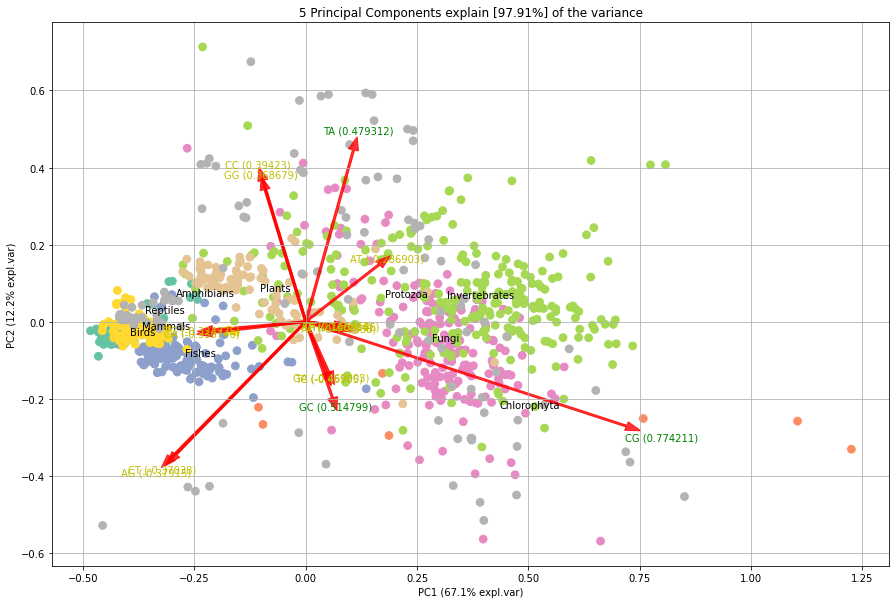

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [97.91%] of the variance'}, xlabel='PC1 (67.1% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

In [15]:
# Scatter plot with loadings

# Find out the colormaps here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

model.biplot(legend=False, label=True, gradient=None, cmap='Set2')

[pca] >Plot PC1 vs PC2 with loadings.


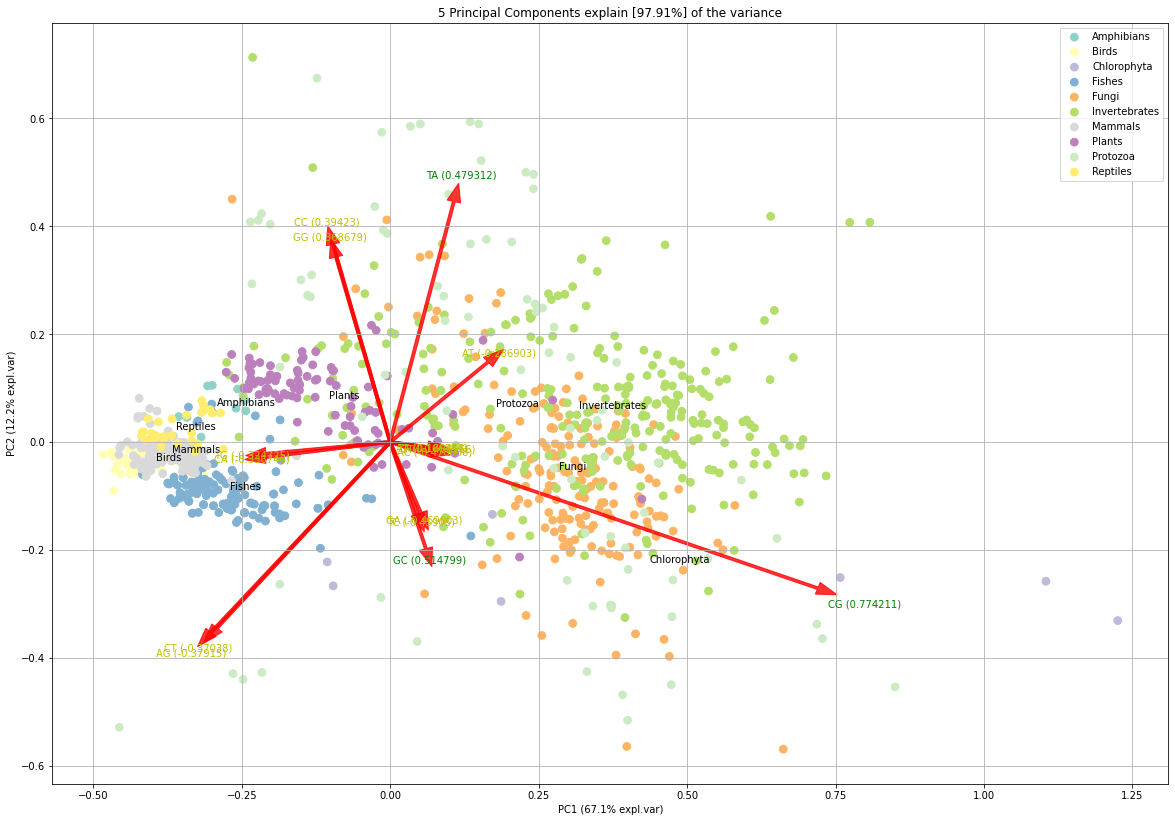

In [16]:
# 2d plot
ax = model.biplot(n_feat=16, label=True, figsize=(20, 14), cmap='Set3')

[pca] >Plot PC1 vs PC2 with loadings.


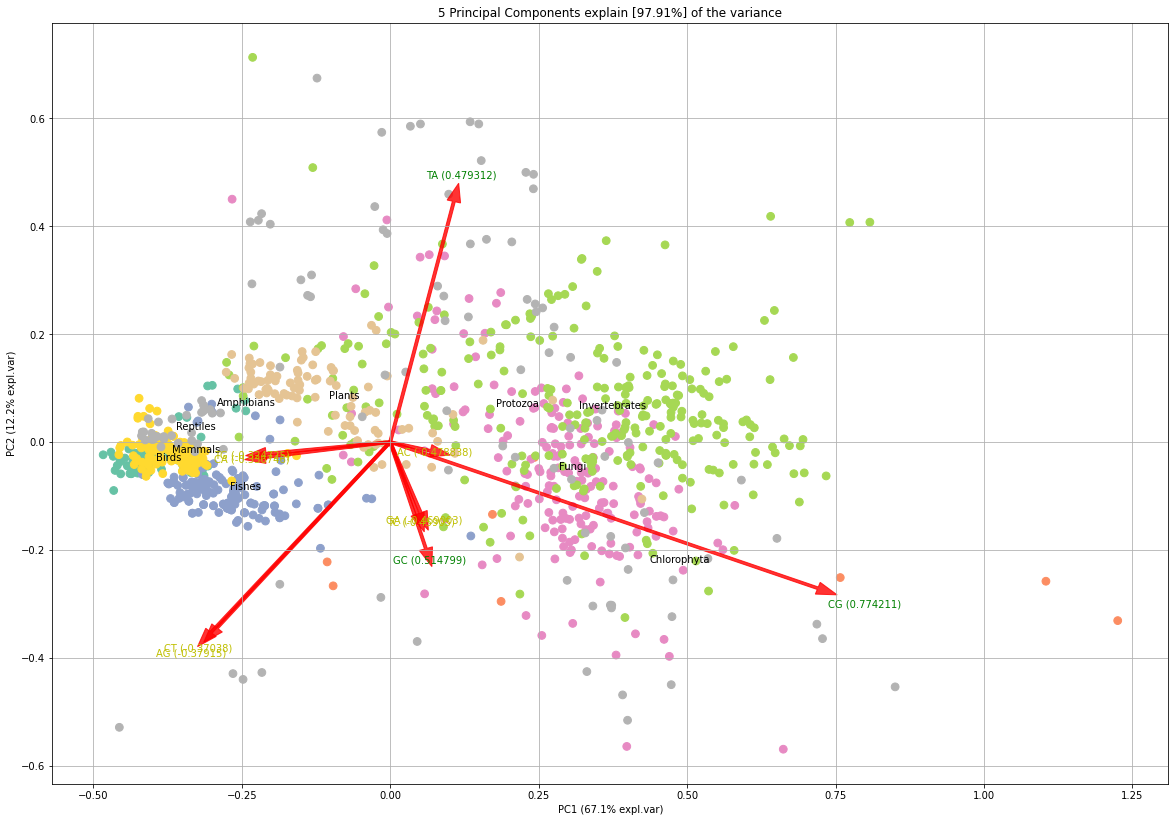

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


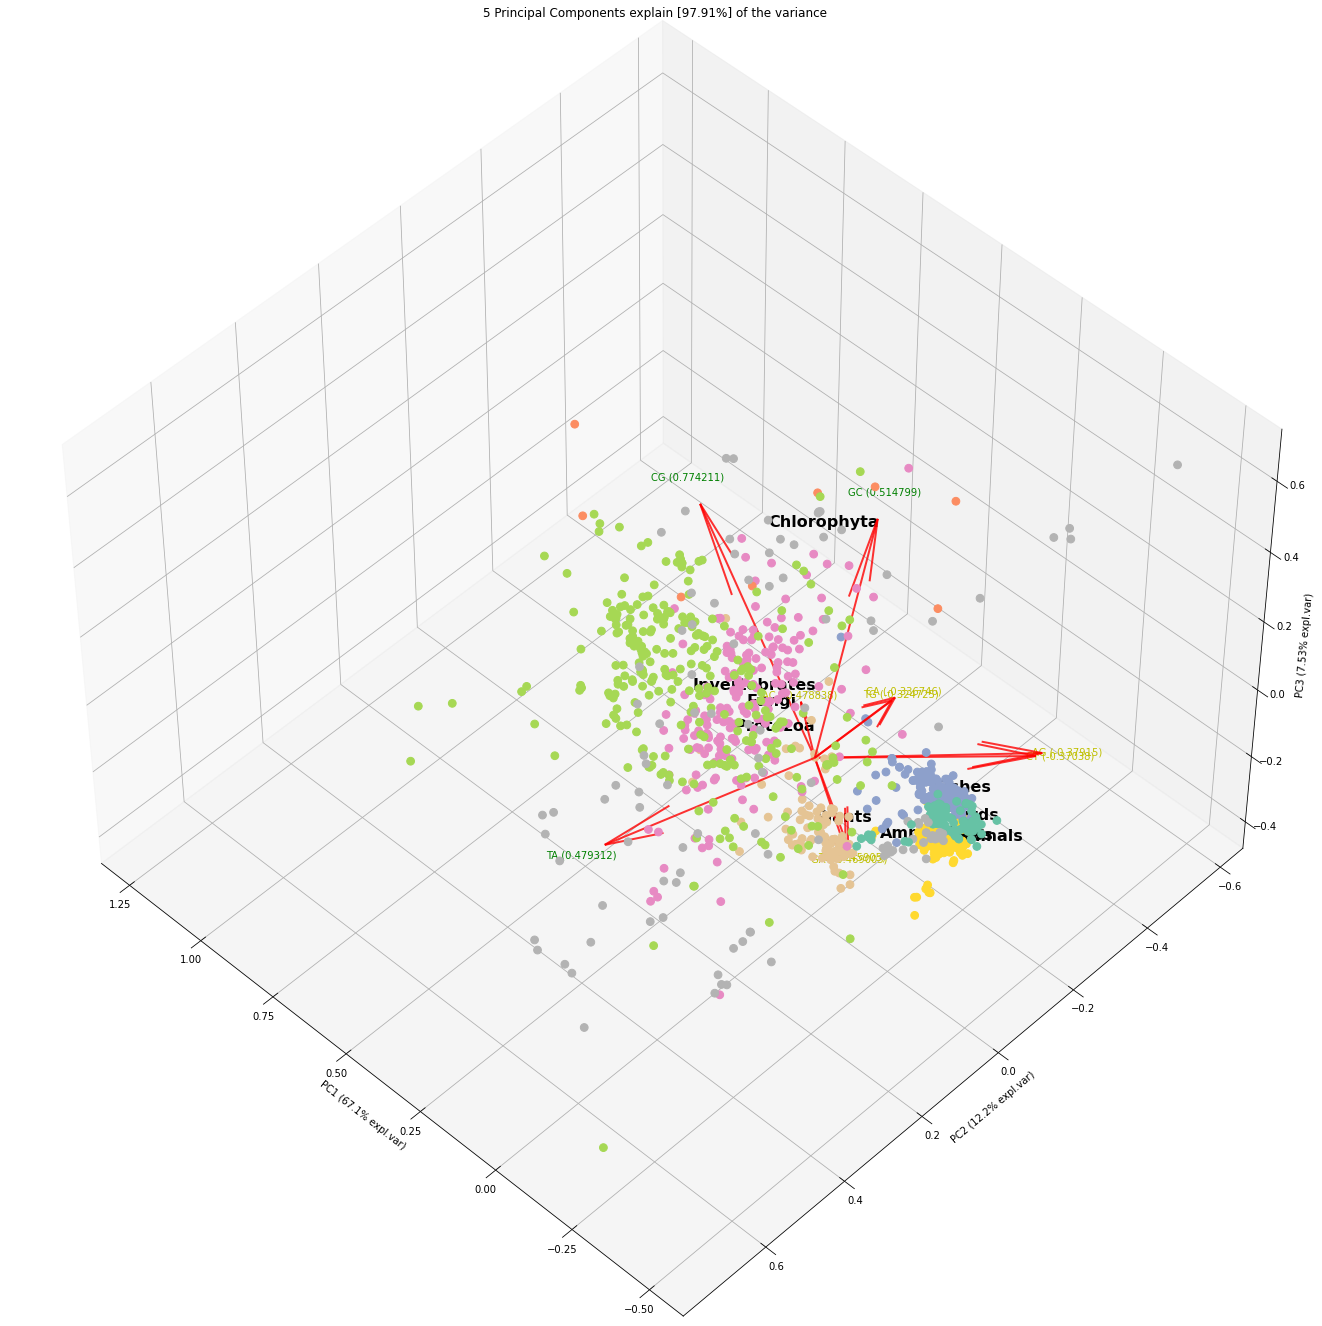

In [17]:
# 2d plot
ax = model.biplot(n_feat=10, legend=False, label=True, figsize=(20, 14), cmap='Set2')

# 3d plot
ax = model.biplot3d(n_feat=10, legend=False, label=True, figsize=(25, 18), cmap='Set2')

[pca] >Plot PC1 vs PC2 with loadings.


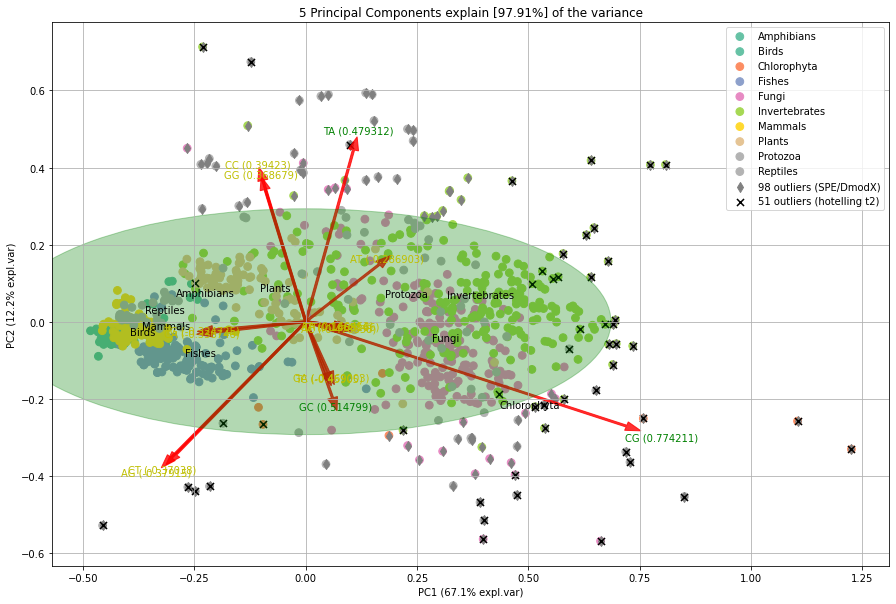

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [97.91%] of the variance'}, xlabel='PC1 (67.1% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

In [18]:
# Make biplot
#model.biplot()

# Here again, many other options can be turned on and off
model.biplot(SPE=True, hotellingt2=True, label = True, cmap='Set2')

[pca] >Plot PC1 vs PC2 with loadings.


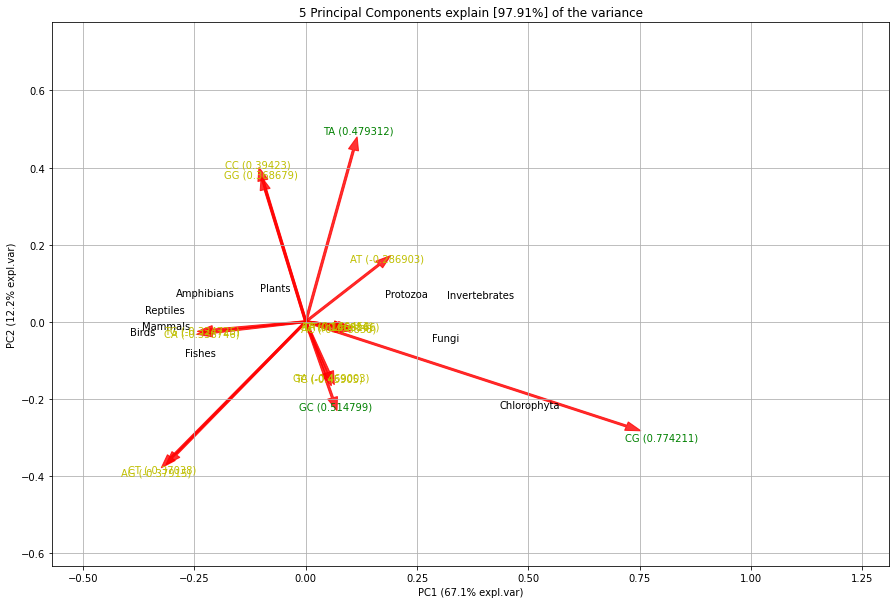

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [97.91%] of the variance'}, xlabel='PC1 (67.1% expl.var)', ylabel='PC2 (12.2% expl.var)'>)

In [19]:
# Make plot with parameters: set cmap to None and label and legend to False. Only directions will be plotted.
model.biplot(cmap=None, label=True, legend=False)

In [20]:
# Print the top features.
print(model.results['topfeat'])

     PC feature   loading  type
0   PC1      CG  0.774211  best
1   PC2      TA  0.479312  best
2   PC3      GC  0.514799  best
3   PC4      GC  0.508743  best
4   PC5      TA  0.504382  best
5   PC5      TG -0.324725  weak
6   PC5      CA -0.336746  weak
7   PC2      AG -0.379150  weak
8   PC2      CT -0.370380  weak
9   PC3      GA -0.469003  weak
10  PC3      TC -0.459050  weak
11  PC4      AC -0.478838  weak
12  PC4      GT -0.468166  weak
13  PC2      CC  0.394230  weak
14  PC2      GG  0.368679  weak
15  PC4      AA  0.169453  weak
16  PC4      TT  0.166884  weak
17  PC5      AT -0.286903  weak
